### BIG MART SALES PREDICTION USING XGBoost

#### Importing Libraries

In [276]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,accuracy_score

#### Data Collection and Analysis

In [277]:
# Loding the dataset from csv file to a Pandas DataFrame
df = pd.read_csv(r'D:\Machine Learning\ADVANCED ALGORITHMS\Ensemble_method\Boosting\Gradient_Approach\XGboost\train_v9rqX0R.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [278]:
# First five rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [279]:
# Number of datapoints & Number of features
df.shape

(8523, 12)

In [280]:
# Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 Categorical Features
- Item_Identifier 
- Item_Fat_Content
- Item_Type 
- Outlet_Establishment_Year
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type



In [281]:
# Checking for missing values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing Values

Mean --> Represents Average Value

Mode --> Most Repeated Value

In [282]:
# Mean value of 'iteam_weight' column
df['Item_Weight'].mean()

np.float64(12.857645184135977)

In [283]:
# Filling the missing values in 'Item_Weight' column with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

C:\Users\hb292\AppData\Local\Temp\ipykernel_23840\3158162691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [284]:
# Checking for missing values For Item_Weight column again
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing The Missing Values In 'outlet_size' with `MODE`

In [285]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [286]:
mode_series = (
    df.dropna(subset=['Outlet_Size'])
      .groupby('Outlet_Type')['Outlet_Size']
      .agg(lambda x: x.mode()[0])
)


In [287]:
missing_values = df['Outlet_Size'].isnull()

df.loc[missing_values, 'Outlet_Size'] = (
    df.loc[missing_values, 'Outlet_Type']
      .map(mode_series)
)


In [288]:
df['Outlet_Size'].isnull().sum()

np.int64(0)

In [289]:
# Checking for missing values again
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Data Analysis

In [290]:
# Statistical measures about the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Numerical features

In [291]:
sns.set()

<Figure size 600x600 with 0 Axes>

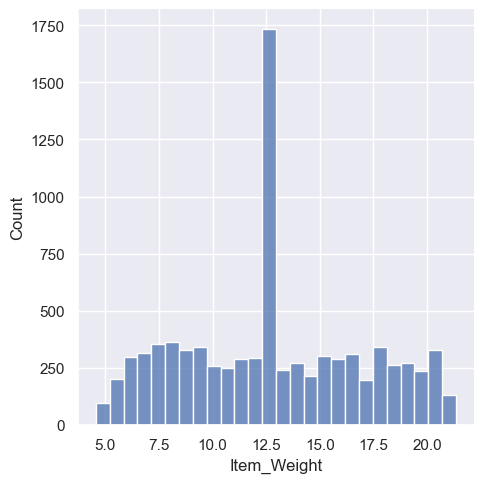

In [292]:
# plot for item weight distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight']) # distribution plot

<Figure size 600x600 with 0 Axes>

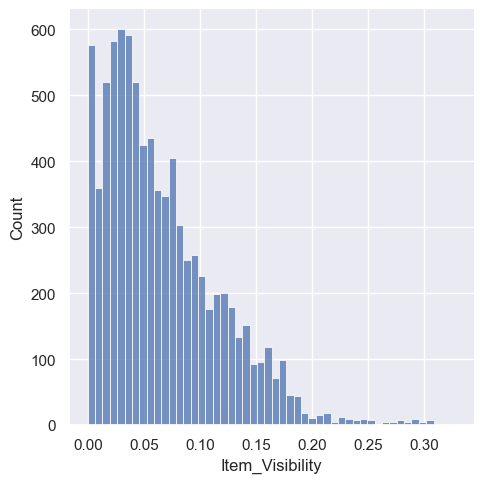

In [293]:
# plot for Item_visibility distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility']) # distribution plot

There is Skewness , Because the value is distributed one side of the graph 

<Figure size 600x600 with 0 Axes>

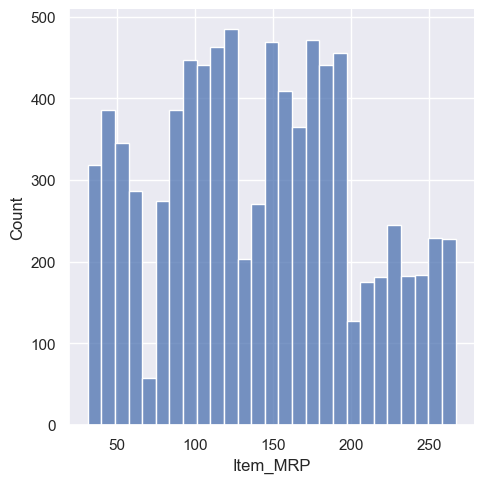

In [294]:
# plot for Item_MRP distribution
plt.figure(figsize = (6,6))
sns.displot(df['Item_MRP']) # distribution plot

<Figure size 600x600 with 0 Axes>

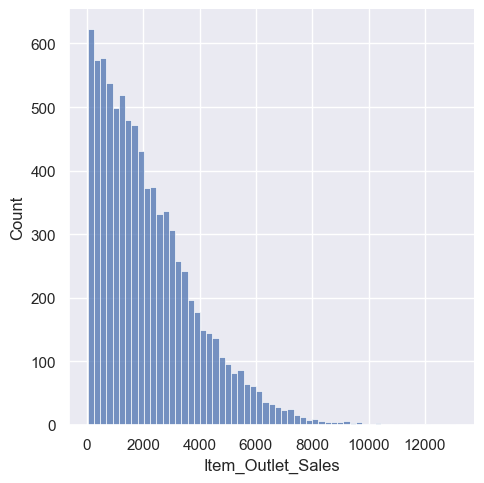

In [295]:
# plot for Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales']) # distribution plot

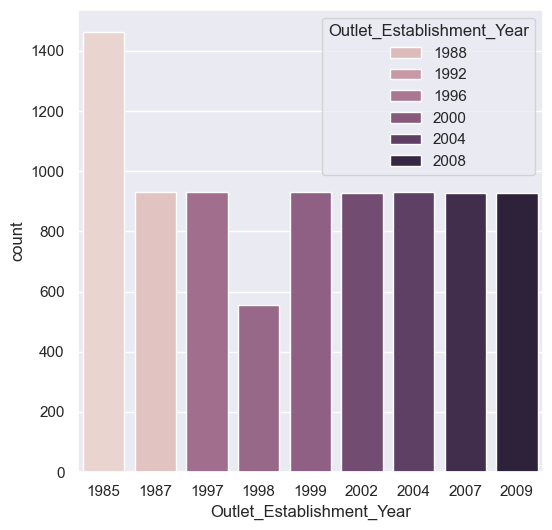

In [296]:
# Outlet_Establishment_Year columns
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df , hue='Outlet_Establishment_Year')
plt.show()

This Plot shows , How Many products are sold in which year!!

More number of products are sold in 1985 and less number of products are sold in 1998.

#### Categorical features

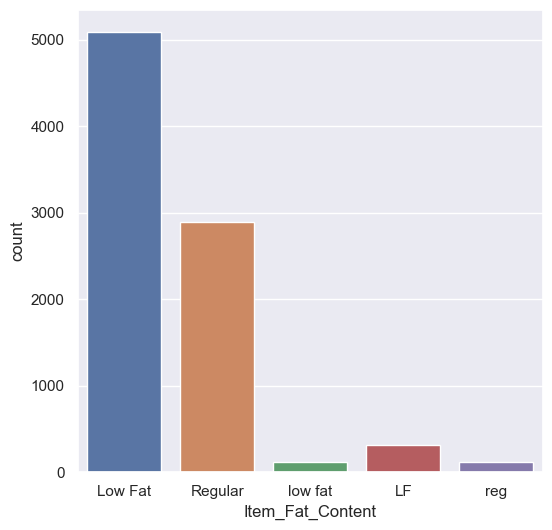

In [297]:
# plot for Item_Fat_content columns
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df , hue='Item_Fat_Content')
plt.show()

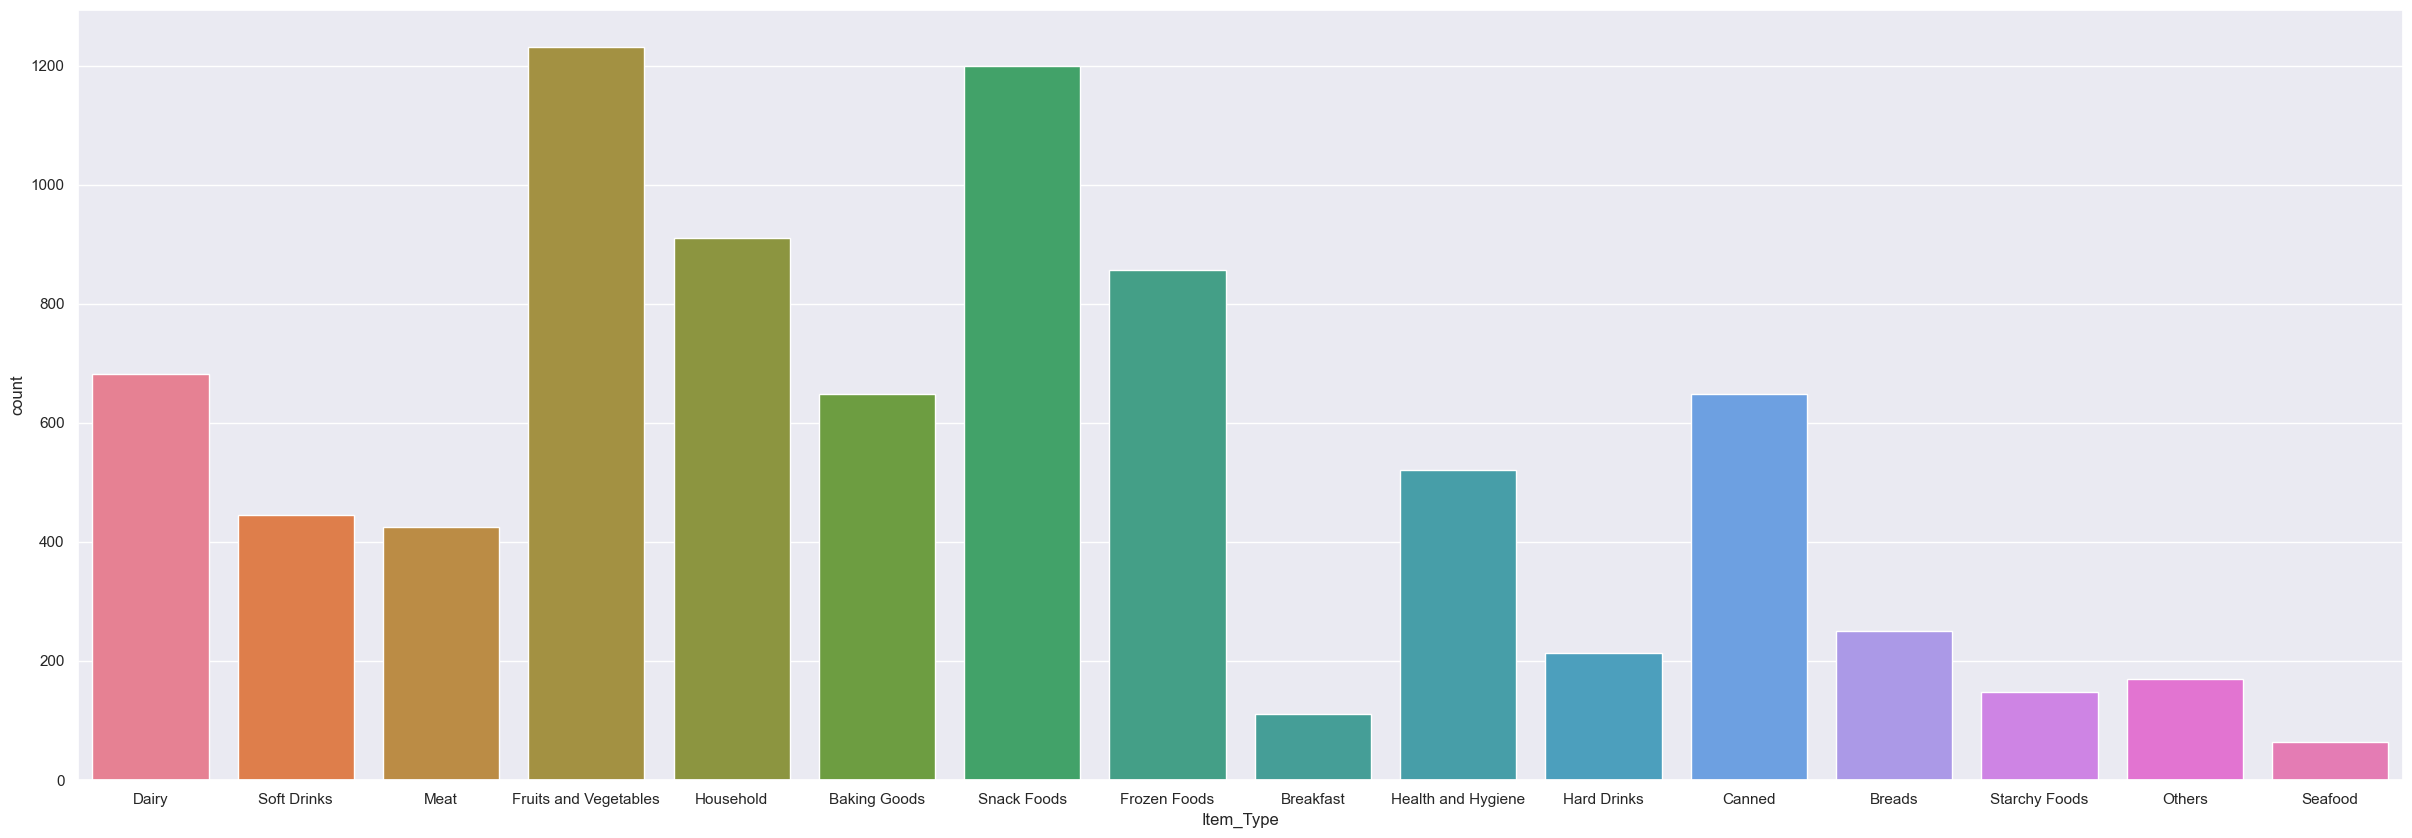

In [298]:
# plot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type', data=df , hue='Item_Type')
plt.show()

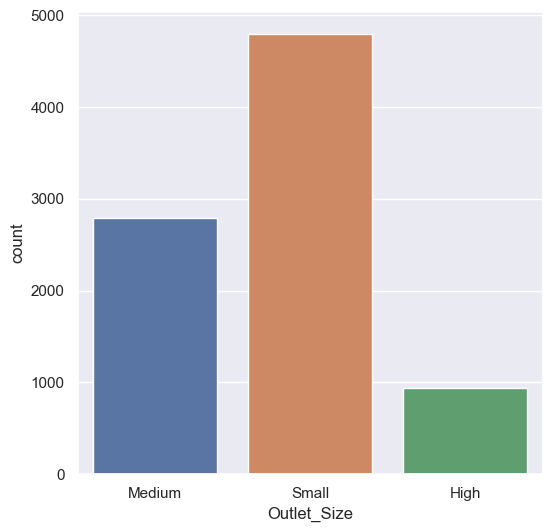

In [299]:
# plot for outlet_size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df , hue='Outlet_Size')
plt.show()

Medium    2793 ---- 0

Small     2388 ---- 1

High       932 ---- 2

### Data Pre-Processing

In [300]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
# Solving Categorical Features Item_Fat_Content as there are multiple categories representing same category
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [302]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}}, inplace=True)

In [303]:
# Checking the value counts again as the categories have been replaced
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [304]:
categorical_cols = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Location_Type',
    'Outlet_Type',
    'Outlet_Size'
]
for col in categorical_cols:
    unique_vals = sorted(df[col].unique())
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    df[col] = df[col].map(mapping)


In [305]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Spliting Features & Target

In [306]:
X = df.drop(columns=['Item_Outlet_Sales','Item_Identifier'], axis=1) # if we want to drop any column we use axis=1
Y = df['Item_Outlet_Sales']

In [307]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [308]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Spliting the data into training data and testing data

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [310]:
print(X.shape,X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


## Machine Learning Model Training

### Xgbosst Regressor

In [311]:
reg = XGBRegressor()

In [312]:
reg.fit(X_train, Y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

### Evaluation

In [319]:
# prediction on training data
pred = reg.predict(X_test)

In [321]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
accuracy = r2_score(Y_test, pred)
print("Accuracy (R²):", accuracy)

Accuracy (R²): 0.5467966199655405
